In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import re

Get filenames

In [11]:
base_path = "G:\\Data\\Projects\\NbSe2\\Tc correlation measurements\\SetD2\\"
# timetraces = glob.glob(base_path + "Timetrace\\*.txt")
podmrs = glob.glob(base_path + "PODMR\\*_range0.dat")
hechos = glob.glob(base_path + "Hecho\\*_pulsed_measurement.dat")

Analyse PODMR

In [3]:
podmr_meas0 = np.zeros(len(podmrs))
podmr_meas0_err = np.zeros(len(podmrs))
podmr_meas1 = np.zeros(len(podmrs))
podmr_meas2 = np.zeros(len(podmrs))
podmr_meas2_err = np.zeros(len(podmrs))
temps = np.zeros(len(podmrs))

for i in range(len(podmrs)):
    path = podmrs[i]
    data_raw = np.loadtxt(path).T
    
    tempstr = re.search(r'temp_.*K', path)
    temps[i] = float(tempstr.group()[5:-1])
    
    var_list,data = (data_raw[0],data_raw[1])

    mode = ''

    #Determine fit

    if mode == 'double':
        fit = afm_scanner_logic._fitlogic.make_lorentziandouble_fit(var_list,data,estimator=afm_scanner_logic._fitlogic.estimate_lorentziandouble_dip)
        lm,_ = fitlogic.make_lorentziandouble_model()

    elif mode == 'N15':
        fit = afm_scanner_logic._fitlogic.make_lorentziandouble_fit(var_list,data,estimator=afm_scanner_logic._fitlogic.estimate_lorentziandouble_N15)
        lm,_ = fitlogic.make_lorentziandouble_model()

    elif mode == 'N14':
        fit = afm_scanner_logic._fitlogic.make_lorentziandouble_fit(var_list,data,estimator=afm_scanner_logic._fitlogic.estimate_lorentziandouble_N14)
        lm,_ = fitlogic.make_lorentziandouble_model()

    else:    
        fit = afm_scanner_logic._fitlogic.make_lorentzian_fit(var_list,data,estimator=afm_scanner_logic._fitlogic.estimate_lorentzian_dip)
        lm,_ = fitlogic.make_lorentzian_model()

    bias_res_freq = fit.params['center'].value

    #Plot Data an
#     plt.plot(var_list,data,'bo')

#     x = np.linspace(var_list[0],var_list[-1],10000, endpoint=True)
#     plt.plot(x, lm.eval(fit.params, x=x),'r-')
#     plt.title(temps[i])

#     plt.show()
    fwhm_bias = fit.params['fwhm'].value*1e-6 #FWHM in MHz
    fwhm_bias_err = fit.params['fwhm'].stderr*1e-6 #FWHM in MHz
    bias_res_freq = fit.params['center'].value*1e-6 #FWHM in MHz
    podmr_meas0[i] = fwhm_bias
    podmr_meas0_err[i] = fwhm_bias_err
    podmr_meas1[i] = bias_res_freq
    podmr_meas2[i] = fit.params['contrast'].value*-1
    podmr_meas2_err[i] = fit.params['contrast'].stderr
#     print(bias_res_freq,'MHz')
#     print(fwhm_bias,'MHz')

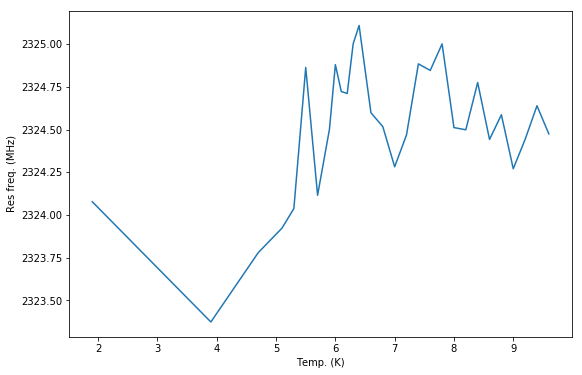

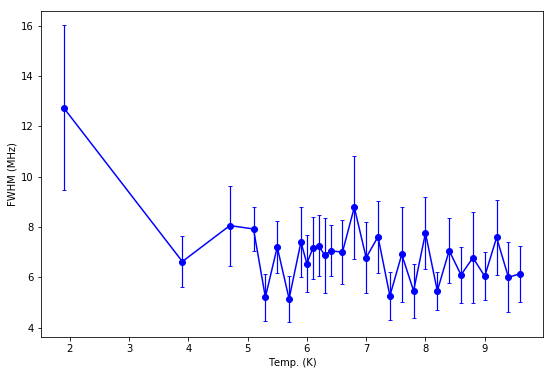

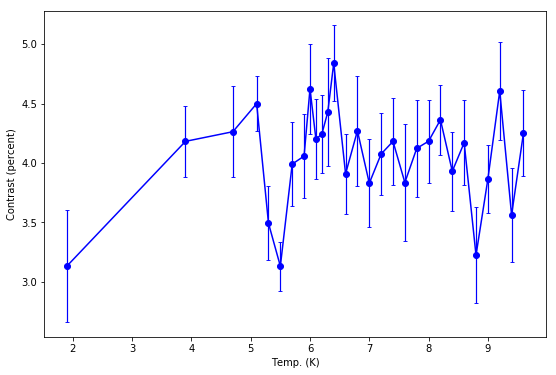

In [5]:
plt.plot(temps, podmr_meas1)
plt.ylabel("Res freq. (MHz)")
plt.xlabel("Temp. (K)")
plt.show()

# plt.plot(temps, podmr_meas0)
plt.errorbar(x=temps, y=podmr_meas0,
                     yerr=podmr_meas0_err, fmt='-o', color='blue',
                     capsize=2, capthick=0.9,
                     elinewidth=1.2)
plt.ylabel("FWHM (MHz)")
plt.xlabel("Temp. (K)")
plt.show()

# plt.plot(temps, podmr_meas2)
plt.errorbar(x=temps, y=podmr_meas2,
                     yerr=podmr_meas2_err, fmt='-o', color='blue',
                     capsize=2, capthick=0.9,
                     elinewidth=1.2)
plt.ylabel("Contrast (percent)")
plt.xlabel("Temp. (K)")
plt.show()

Analyse HEcho

In [12]:
hecho_meas0 = np.zeros(len(hechos))
hecho_meas0_err = np.zeros(len(hechos))
hecho_meas1 = np.zeros(len(hechos))
temp = np.zeros(len(hechos))

for i in range(len(hechos[:])):
    path = hechos[i]
    data_raw = np.loadtxt(path).T
    
    tempstr = re.search(r'temp_.*K', path)
    temp[i] = float(tempstr.group()[5:-1])
    
    var_list = data_raw[0]

    mode = 'exp_decay'
    plot_option = 3 #1 = Signal1, 2 = Signal2, 3 = delta of signals
    err = None

    #Choose what to plot
    if plot_option == 3:
        data = data_raw[1] - data_raw[2]
        shift = (data_raw.shape[0]-1)//2
        err1 = abs(data_raw[1+shift])
        err2 = abs(data_raw[2+shift])
        err = err1+err2
    else:
        data = data_raw[plot_option]
        shift = (data_raw.shape[0]-1)//2
        err = data_raw[plot_option+shift]

    plt.title(f"{temp[i]}")

    plt.xlabel('Frequency (Hz)')

    #Determine fi
    if mode == 'exp_decay':
        fit = afm_scanner_logic._fitlogic.make_decayexponential_fit(var_list[:],data[:],estimator=afm_scanner_logic._fitlogic.estimate_decayexponential)
        lm,_ = fitlogic.make_decayexponential_model()
        leg = f"Lifetime ({mode}): {round(fit.params['lifetime']*1e6,2)} us +- {round(fit.params['lifetime'].stderr*1e6,2)} us"
        plt.xlabel('Time (s)')


    #Plot Data an
#     plt.plot(var_list,data,'bo')
#     if not err is None:
#         plt.errorbar(x=var_list, y=data,
#                      yerr=err, fmt='-o', color='blue',
#                      capsize=2, capthick=0.9,
#                      elinewidth=1.2)

#     x = np.linspace(var_list[0],var_list[-1],10000, endpoint=True)
#     plt.plot(x, lm.eval(fit.params, x=x),'r-',label=leg)

#     plt.legend()

# #     plt.rcParams['figure.figsize'] = (9, 6)
# #     fontsize = 12
# #     # with open(filepath+f'_jupyter_plot_{plot_option}_{mode}.png', 'wb') as f:
# #     #     plt.savefig(f,format='png',dpi=600)
#     plt.show()
    hecho_meas0[i] = fit.params['lifetime']*1e6
    hecho_meas0_err[i] = fit.params['lifetime'].stderr*1e6



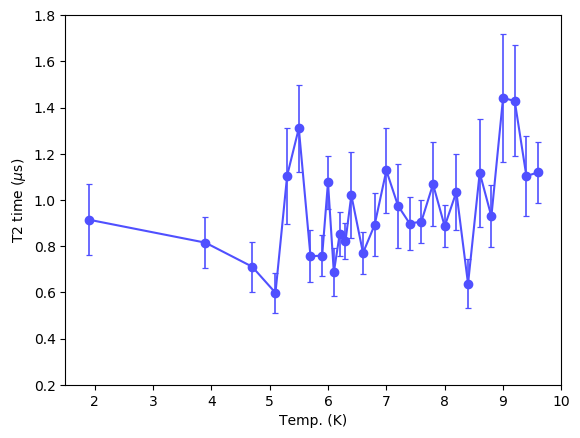

0.006484850499839221 T
6.059507453268571 MHz
0.006484850499839221 T
6.059507453268571 MHz


In [14]:
plt.style.use('default')
# plt.plot(temp, hecho_meas0)

color1 = (80/255,80/255,255/255)
color2 = (255/255,80/255,80/255)

plt.errorbar(x=temp, y=hecho_meas0,
                     yerr=hecho_meas0_err, fmt='-o', color=color1,
                     capsize=2, capthick=0.9,
                     elinewidth=1.2)

plt.xlabel('Temp. (K)')
plt.ylabel('T2 time ($\mu$s)')
plt.xlim(1.5,10)
plt.ylim(0.2,1.8)

with open(base_path+f'_jupyter_plot_setD2.svg', 'wb') as f:
    plt.savefig(f,format='svg',dpi=700)

plt.show()



In [7]:
temp

array([1.9, 3.9, 4.7, 5.1, 5.3, 5.5, 5.7, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.6, 6.8, 7. , 7.2, 7.4, 7.6, 7.8, 8. , 8.2, 8.4, 8.6, 8.8, 9. ,
       9.2, 9.4, 9.6])